In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [28]:
import io

In [29]:
# 담보정보 불러오기
df1= pd.read_csv("SDB4_I_CT_MGG_PVT.csv", encoding ='UTF8')

In [ ]:
df1.SCTR_CD.unique()  #담보정보업권코드의 유니크 값 

In [32]:
df1_group = df1.groupby("SCTR_CD").count()
df1_group

,JOIN_SN,JOIN_SN_TYP,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,...,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
SCTR_CD,,,,,,,,,,,,,,,,,,,,,
3,45579,45579,45579,45579,45579,45579,45579,45579,45579,45579,...,45579,45579,45579,45579,45579,45579,45579,45579,45579,45579
6,979563,979563,979563,979563,979563,979563,979563,979563,979563,979563,...,979563,979563,979563,979563,979563,979563,979563,979563,979563,979563
8,383029,383029,383029,383029,383029,383029,383029,383029,383029,383029,...,383029,383029,383029,383029,383029,383029,383029,383029,383029,383029


([<matplotlib.patches.Wedge at 0x2769c3a96a0>,
 [Text(0.722232330015483, 0.8296869659578886, '8'),
  Text(-0.8027235088386471, -0.7520870749838551, '6'),
  Text(1.0943179174670497, -0.11166152206816558, '3')])

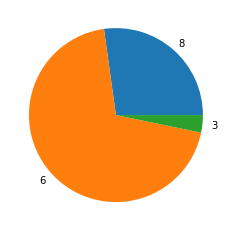

In [33]:
SCTR_CD_arr = []
labels=[]
for i in df1.SCTR_CD.unique():
    SCTR_CD_arr.append(df1_group["JOIN_SN"][i])
    labels.append(i)
plt.pie(SCTR_CD_arr, labels=labels)

# 업권코드 종류 비율 (6 :손해보험사 >  8:생명보험사  > 3: 신용협동기구)

In [35]:
# 차주정보 > 연령대별 추가 
df2 = pd.read_csv("SDB4_A_ID.csv", encoding ='UTF8')
df2_copy = df2.copy()
df2_copy['AGE'] = 2022 - df2_copy['BTH_YR']

In [37]:
# 차주정보와 보험담보정보 merge
# POL_SN : 
df3 = pd.merge(
        df1, df2_copy, left_on="JOIN_SN", right_on="JOIN_SN"
    )
df3

,JOIN_SN,JOIN_SN_TYP_x,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,...,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006,JOIN_SN_TYP_y,BTH_YR,GENDER,IS_KRN,AGE
0,1492718,1,8,5418925,A1,A1300,1,65000,65000,65000,...,1,1,1,1,1,1,2003,1,1,19
1,1492718,1,8,5418925,A5,A5109,1,3900,3900,3900,...,1,1,1,1,1,1,2003,1,1,19
2,1492718,1,8,5418925,A5,A5309,1,3900,3900,3900,...,1,1,1,1,1,1,2003,1,1,19
3,1492718,1,8,5418925,A4,A4109,1,46000,46000,46000,...,1,1,1,1,1,1,2003,1,1,19
4,1492718,1,8,5418925,A4,A4102,1,59000,59000,59000,...,1,1,1,1,1,1,2003,1,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329474,395308,1,8,6684546,A3,A3412,1,9000,9000,9000,...,0,0,0,0,0,1,1962,1,1,60
1329475,1469668,1,6,7980396,A3,A3301,1,10000,10000,10000,...,1,1,1,1,1,1,1986,2,1,36
1329476,1915130,1,6,7326022,A3,A3399,1,10000,10000,10000,...,1,1,1,1,1,1,1996,2,1,26
1329477,584112,1,8,5059506,A3,A3301,1,10000,10000,10000,...,1,1,1,1,1,1,2001,2,1,21


# 차주정보 + 보험담보정보 => 한가지 증권번호가 여러개 > 담보가 여러가지

In [71]:
# df3.groupby('POL_SN').count()
mask1 = (df3.POL_SN == 5418925)
df3_teenage = df3.loc[mask1,:]
print(df3_teenage.head())
# 19살, 한 보험 5418925 > 상해사망 질병종수술 상해종수술 치매진단 뇌출혈진단


   JOIN_SN  JOIN_SN_TYP_x  SCTR_CD   POL_SN MGG_GRP_CD MGG_CD  MGG_CNT  \
0  1492718              1        8  5418925         A1  A1300        1   
1  1492718              1        8  5418925         A5  A5109        1   
2  1492718              1        8  5418925         A5  A5309        1   
3  1492718              1        8  5418925         A4  A4109        1   
4  1492718              1        8  5418925         A4  A4102        1   

   MGG_AMT_SUM  MGG_AMT_MAX  MGG_AMT_MIN  ...  YM_202003  YM_202004  \
0        65000        65000        65000  ...          1          1   
1         3900         3900         3900  ...          1          1   
2         3900         3900         3900  ...          1          1   
3        46000        46000        46000  ...          1          1   
4        59000        59000        59000  ...          1          1   

   YM_202005  YM_202006  JOIN_SN_TYP_y  Age_category  BTH_YR  GENDER  IS_KRN  \
0          1          1              1          

In [68]:
# 연령별나누기 10대 이상만
cond = df2_copy.AGE >= 10
cond

0        True
1        True
2        True
3        True
4        True
         ... 
49129    True
49130    True
49131    True
49132    True
49133    True
Name: AGE, Length: 49134, dtype: bool

In [39]:
def age_categorize(age):
    age = (age //10 ) * 10
    return age

In [41]:
Age_category = df2_copy.AGE.apply(age_categorize)
Age_category

0        10
1        80
2        20
3        20
4        30
         ..
49129    60
49130    30
49131    20
49132    10
49133    80
Name: AGE, Length: 49134, dtype: int64

In [42]:
Age_category = Age_category.astype('category')
Age_category

0        10
1        80
2        20
3        20
4        30
         ..
49129    60
49130    30
49131    20
49132    10
49133    80
Name: AGE, Length: 49134, dtype: category
Categories (9, int64): [10, 20, 30, 40, ..., 60, 70, 80, 2020]

In [43]:
df2_copy.insert(2, 'Age_category', Age_category)
df2_copy

,JOIN_SN,JOIN_SN_TYP,Age_category,BTH_YR,GENDER,IS_KRN,AGE
0,169568,1,10,2010,2,1,12
1,1076771,1,80,1942,1,1,80
2,233370,1,20,1997,2,1,25
3,945944,1,20,1998,2,1,24
4,210996,1,30,1986,2,1,36
...,...,...,...,...,...,...,...
49129,90161,1,60,1962,1,1,60
49130,1858480,1,30,1992,1,1,30
49131,622364,1,20,1994,1,1,28
49132,924265,1,10,2010,1,1,12


In [50]:
# 보험계약정보
df4 = pd.read_csv("SDB4_I_CT_CONT_PVT.csv", encoding ='UTF8')
df4

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,...,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,6,3166565,0,4,3,200702,200702,200702,202202,999912,...,1,1,1,1,1,1,1,1,1,1
1,8,1346256,0,4,2,201812,999912,201812,201912,999912,...,1,1,1,0,0,0,0,0,0,0
2,6,8858774,0,13,2,201309,999912,201309,208009,999912,...,1,1,1,1,1,1,1,1,1,1
3,6,4694185,0,13,2,202002,999912,202002,202102,999912,...,0,0,0,0,0,1,1,1,1,1
4,8,9366539,0,8,2,201804,999912,201804,202804,999912,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368834,3,8180813,0,1,7,201302,201608,201302,999912,999912,...,1,1,1,1,1,1,1,1,1,1
368835,8,7644118,0,1,2,201107,999912,201107,999912,999912,...,1,1,1,1,1,1,1,1,1,1
368836,8,7280863,0,7,2,201605,999912,201605,204605,999912,...,0,0,0,0,0,0,0,0,1,1
368837,6,2172012,0,3,2,201911,999912,201911,207611,999912,...,0,0,1,1,1,1,1,1,1,1


In [53]:
# 계약정보와 보험담보정보 merge
# 담보 : df1, 계약 : df4 
df5 = pd.merge(
        df1, df4, left_on="POL_SN", right_on="POL_SN"
    )
df5

,JOIN_SN,JOIN_SN_TYP,SCTR_CD_x,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,...,YM_201909_y,YM_201910_y,YM_201911_y,YM_201912_y,YM_202001_y,YM_202002_y,YM_202003_y,YM_202004_y,YM_202005_y,YM_202006_y
0,1492718,1,8,5418925,A1,A1300,1,65000,65000,65000,...,1,1,1,1,1,1,1,1,1,1
1,1492718,1,8,5418925,A5,A5109,1,3900,3900,3900,...,1,1,1,1,1,1,1,1,1,1
2,1492718,1,8,5418925,A5,A5309,1,3900,3900,3900,...,1,1,1,1,1,1,1,1,1,1
3,1492718,1,8,5418925,A4,A4109,1,46000,46000,46000,...,1,1,1,1,1,1,1,1,1,1
4,1492718,1,8,5418925,A4,A4102,1,59000,59000,59000,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900079,1501499,1,8,4126116,A3,A3300,1,10000,10000,10000,...,0,0,0,0,0,1,1,1,1,1
2900080,1852588,1,8,4932470,A4,A4200,1,24000,24000,24000,...,1,1,1,1,1,1,1,1,1,1
2900081,1598515,1,8,3885891,A4,A4200,1,45000,45000,45000,...,1,1,1,1,1,1,1,1,1,1
2900082,124846,1,8,2111990,A3,A3301,1,8000,8000,8000,...,1,1,1,1,1,1,1,1,1,1


In [57]:
# 3가지 다 합치기  차주 : df2_copy  df5 : (계약정보,보험담보정보) merge
df6 = pd.merge(
    df2_copy, df5, left_on="JOIN_SN", right_on="JOIN_SN"
    )
mask2 = (df6.POL_SN == 5418925)
df6_teenage = df6.loc[mask2,:]
print(df6_teenage.head())

,JOIN_SN,JOIN_SN_TYP_x,Age_category,BTH_YR,GENDER,IS_KRN,AGE,JOIN_SN_TYP_y,SCTR_CD_x,POL_SN,...,YM_201909_y,YM_201910_y,YM_201911_y,YM_201912_y,YM_202001_y,YM_202002_y,YM_202003_y,YM_202004_y,YM_202005_y,YM_202006_y
0,233370,1,20,1997,2,1,25,1,8,344059,...,1,1,1,1,1,1,1,1,1,1
1,233370,1,20,1997,2,1,25,1,8,344059,...,1,1,1,1,1,1,1,1,1,1
2,233370,1,20,1997,2,1,25,1,8,344059,...,1,1,1,1,1,1,1,1,1,1
3,233370,1,20,1997,2,1,25,1,8,344059,...,1,1,1,1,1,1,1,1,1,1
4,233370,1,20,1997,2,1,25,1,8,344059,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159719,924265,1,10,2010,1,1,12,1,6,4539644,...,1,1,1,1,1,1,1,1,1,1
2159720,924265,1,10,2010,1,1,12,1,6,4539644,...,1,1,1,1,1,1,1,1,1,1
2159721,924265,1,10,2010,1,1,12,1,6,4539644,...,1,1,1,1,1,1,1,1,1,1
2159722,924265,1,10,2010,1,1,12,1,6,4539644,...,1,1,1,1,1,1,1,1,1,1
